# Tasca M9 T01 Text_mining

**Descripció:Exercicis d'anàlisi de sentiment i textos.**

What is Sentiment Analysis?
Sentiment analysis is a technique used to determine the emotional tone or sentiment expressed in a text. It involves analyzing the words and phrases used in the text to identify the underlying sentiment, whether it is positive, negative, or neutral. 

In [1]:
!pip install wordcloud

In [2]:
# import libraries
import pandas as pd

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

from nltk import FreqDist

import matplotlib.pyplot as plt

## - Exercici 1
**Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.**

He escollit agafar una review d'un llibre bastant polèmic que m'estic llegint ara mateix: Can't Hurt Me: Master Your Mind and Defy the Odds de David Goggings. 

### Sinopsis
"Can't Hurt Me" és un best seller del New York Times que relata la vida de David Goggins. Des de la seva infància marcada per la pobresa i l'abús, Goggins transforma la seva vida amb autodisciplina i fortalesa mental, convertint-se en una icona de les Forces Armades dels Estats Units i un dels atletes de resistencia més destacats del món. Únic en la història per completar entrenaments d'elit com a Navy SEAL, Army Ranger i Air Force Tactical Air Controller, Goggins comparteix la seva inspiradora història i presenta el concepte del "40% Rule", argumentant que la majoria de nosaltres utilitza només el 40% de les nostres capacitats. El llibre ofereix més de 5 milions de còpies venudes i conté poderoses lliçons sobre superació personal i rendiment excepcional.


In [3]:
review =  """I'm of two minds about this book.

On the one hand, it's an inspiring story of a man who has overcome a lifetime of struggle and proved that you can do anything if you're willing to push yourself. In the first half of the book especially this was a message that resonated with me and made me think about David Goggins as a man to look up to.

On the other hand, it's a cautionary tale of a man who is so stubborn he can not learn from his past mistakes. He is constantly going into situations underprepared and then pushing his body past the point of sanity in order to accomplish a goal and seemingly expecting applause for that. Were he in some life or death situation then I might just give him said applause, but instead, he is always just trying to prove something to himself which is a really unhealthy way to go through life.

Overall there were two main lessons to take from Mr Goggins story. One is that if you really put your mind to a task you can achieve the impossible. The second is that there is nothing admirable about taking the path of highest resistance just for the sake of personal pride. Yes, Mr Goggins has achieved amazing things, but there are others who have achieved similar results in a more intelligent and healthy way.

In the end, I came in exactly on the halfway mark in regards to how I felt about this book and I have rounded up for the sake of not wanting to give this book a 2-star review.

One final note is a comment on the audiobook. Mr Goggins made the decision to insert multiple interludes that feature the narrator interviewing him. These were interesting at first but soon grew really tiresome. They felt really self-serving as each one went along the lines of the narrator expressing how in awe of David Goggins he was, and David Goggins expressing yet again how hard it was for him to achieve his goals. I could have done without 50% of these as well."""
print(review)

I'm of two minds about this book.

On the one hand, it's an inspiring story of a man who has overcome a lifetime of struggle and proved that you can do anything if you're willing to push yourself. In the first half of the book especially this was a message that resonated with me and made me think about David Goggins as a man to look up to.

On the other hand, it's a cautionary tale of a man who is so stubborn he can not learn from his past mistakes. He is constantly going into situations underprepared and then pushing his body past the point of sanity in order to accomplish a goal and seemingly expecting applause for that. Were he in some life or death situation then I might just give him said applause, but instead, he is always just trying to prove something to himself which is a really unhealthy way to go through life.

Overall there were two main lessons to take from Mr Goggins story. One is that if you really put your mind to a task you can achieve the impossible. The second is tha

In [4]:
# Paraules en minúsucla
review_min = review.lower()
print (review_min)

i'm of two minds about this book.

on the one hand, it's an inspiring story of a man who has overcome a lifetime of struggle and proved that you can do anything if you're willing to push yourself. in the first half of the book especially this was a message that resonated with me and made me think about david goggins as a man to look up to.

on the other hand, it's a cautionary tale of a man who is so stubborn he can not learn from his past mistakes. he is constantly going into situations underprepared and then pushing his body past the point of sanity in order to accomplish a goal and seemingly expecting applause for that. were he in some life or death situation then i might just give him said applause, but instead, he is always just trying to prove something to himself which is a really unhealthy way to go through life.

overall there were two main lessons to take from mr goggins story. one is that if you really put your mind to a task you can achieve the impossible. the second is tha

Un cop tenim totes les paraules en miniscula procedeixo a fragmentar el text a través del procés de tokenització. 

La **tokenització** és el procés de dividir un text en unitats més petites anomenades “tokens”. Un token pot ser tan curt com un caràcter o tan llarg com una paraula o fins i tot una frase sencera, depenent del nivell de granularitat que es desitgi a l'anàlisi del text.

En el context del processament del llenguatge natural (NLP), la tokenització generalment es refereix a **dividir un text en paraules o en unitats més petites, com els “tokens” de paraules**. Això facilita l'anàlisi posterior del text, ja que cada mot es tracta com una unitat individual.

In [5]:
tokenized_review = nltk.word_tokenize(review_min)
tokenized_review

['i',
 "'m",
 'of',
 'two',
 'minds',
 'about',
 'this',
 'book',
 '.',
 'on',
 'the',
 'one',
 'hand',
 ',',
 'it',
 "'s",
 'an',
 'inspiring',
 'story',
 'of',
 'a',
 'man',
 'who',
 'has',
 'overcome',
 'a',
 'lifetime',
 'of',
 'struggle',
 'and',
 'proved',
 'that',
 'you',
 'can',
 'do',
 'anything',
 'if',
 'you',
 "'re",
 'willing',
 'to',
 'push',
 'yourself',
 '.',
 'in',
 'the',
 'first',
 'half',
 'of',
 'the',
 'book',
 'especially',
 'this',
 'was',
 'a',
 'message',
 'that',
 'resonated',
 'with',
 'me',
 'and',
 'made',
 'me',
 'think',
 'about',
 'david',
 'goggins',
 'as',
 'a',
 'man',
 'to',
 'look',
 'up',
 'to',
 '.',
 'on',
 'the',
 'other',
 'hand',
 ',',
 'it',
 "'s",
 'a',
 'cautionary',
 'tale',
 'of',
 'a',
 'man',
 'who',
 'is',
 'so',
 'stubborn',
 'he',
 'can',
 'not',
 'learn',
 'from',
 'his',
 'past',
 'mistakes',
 '.',
 'he',
 'is',
 'constantly',
 'going',
 'into',
 'situations',
 'underprepared',
 'and',
 'then',
 'pushing',
 'his',
 'body',
 'past'

In [6]:
freq = FreqDist(tokenized_review)
print(freq.most_common(20))

[('the', 17), ('.', 16), ('to', 13), ('of', 12), ('a', 12), (',', 8), ('in', 8), ('is', 8), ('and', 7), ('i', 6), ('that', 6), ('goggins', 6), ('he', 5), ('about', 4), ('this', 4), ('book', 4), ('on', 4), ('one', 4), ('you', 4), ('for', 4)]


No m'interesa que compti els signes de puntuació per això procedeixo a eliminar-los.

In [7]:
tokens = [token for token in tokenized_review if token.isalpha()]
tokens

['i',
 'of',
 'two',
 'minds',
 'about',
 'this',
 'book',
 'on',
 'the',
 'one',
 'hand',
 'it',
 'an',
 'inspiring',
 'story',
 'of',
 'a',
 'man',
 'who',
 'has',
 'overcome',
 'a',
 'lifetime',
 'of',
 'struggle',
 'and',
 'proved',
 'that',
 'you',
 'can',
 'do',
 'anything',
 'if',
 'you',
 'willing',
 'to',
 'push',
 'yourself',
 'in',
 'the',
 'first',
 'half',
 'of',
 'the',
 'book',
 'especially',
 'this',
 'was',
 'a',
 'message',
 'that',
 'resonated',
 'with',
 'me',
 'and',
 'made',
 'me',
 'think',
 'about',
 'david',
 'goggins',
 'as',
 'a',
 'man',
 'to',
 'look',
 'up',
 'to',
 'on',
 'the',
 'other',
 'hand',
 'it',
 'a',
 'cautionary',
 'tale',
 'of',
 'a',
 'man',
 'who',
 'is',
 'so',
 'stubborn',
 'he',
 'can',
 'not',
 'learn',
 'from',
 'his',
 'past',
 'mistakes',
 'he',
 'is',
 'constantly',
 'going',
 'into',
 'situations',
 'underprepared',
 'and',
 'then',
 'pushing',
 'his',
 'body',
 'past',
 'the',
 'point',
 'of',
 'sanity',
 'in',
 'order',
 'to',
 'a

In [8]:
freq = FreqDist(tokens)
print(freq.most_common(30))

[('the', 17), ('to', 13), ('of', 12), ('a', 12), ('in', 8), ('is', 8), ('and', 7), ('i', 6), ('that', 6), ('goggins', 6), ('he', 5), ('about', 4), ('this', 4), ('book', 4), ('on', 4), ('one', 4), ('you', 4), ('for', 4), ('really', 4), ('it', 3), ('man', 3), ('who', 3), ('can', 3), ('was', 3), ('david', 3), ('as', 3), ('his', 3), ('were', 3), ('just', 3), ('him', 3)]


In [9]:
print(f'\nLa review té {len(tokens)} paraules')


La review té 350 paraules


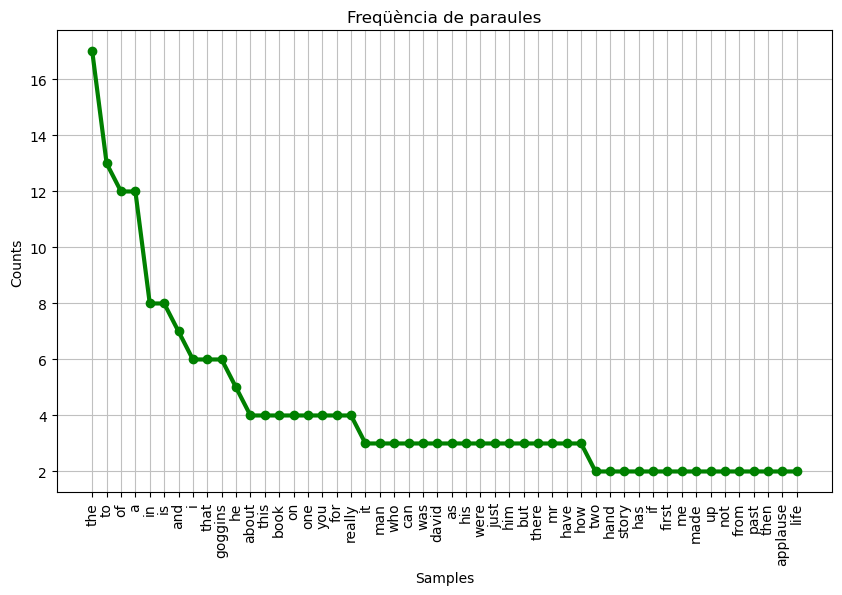

In [10]:
# Calcular la freqüència 
freq1 = FreqDist(tokens)

plt.figure(figsize=(10, 6))
freq1.plot(50, cumulative=False, linewidth=3, title='Freqüència de paraules', color='green', marker='o')

# Mostrar el gráfico
plt.show()



Les paraules més freqüents son articles i  pronoms, anomenades també stopwords. No aporten informació significativa, de forma que de vegades no s'utilitzen per aquests analisis.  

In [11]:
frequency = nltk.FreqDist(tokens)
frequency

FreqDist({'the': 17, 'to': 13, 'of': 12, 'a': 12, 'in': 8, 'is': 8, 'and': 7, 'i': 6, 'that': 6, 'goggins': 6, ...})

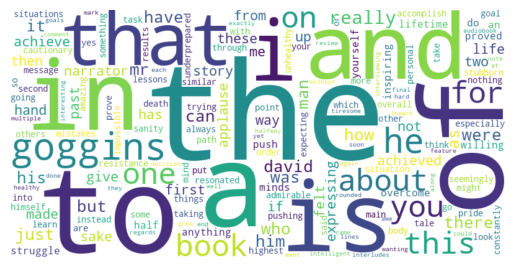

In [12]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(freq1)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

La imatge superior mostra més gran o més petita la paraula en funció de la freqüencia. 

## - Exercici 2
**Treu les stopwords i realitza stemming al teu conjunt de dades.**

L'eliminació de stopwords és un pas crucial del preprocessament de text en l'anàlisi de sentiments que implica eliminar paraules comunes i irrellevants que és poc probable que transmetin gaire sentiment. Les paraules stop són paraules que són molt comunes en una llengua i que no tenen gaire significat, com ara "i", "el", "de" i "ell". Aquestes paraules poden causar soroll i distorsionar l'anàlisi si no s'eliminen.

In [13]:
 # Remove stop words
filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

In [14]:
frequency2 = nltk.FreqDist(filtered_tokens)
frequency2

FreqDist({'goggins': 6, 'book': 4, 'one': 4, 'really': 4, 'man': 3, 'david': 3, 'mr': 3, 'two': 2, 'hand': 2, 'story': 2, ...})

Si treiem les stopwords quedaria aixi el recompte i la frequencia:

In [15]:
print(f'\nLa review té {len(filtered_tokens)} paraules sense comptar stopwords')


La review té 162 paraules sense comptar stopwords


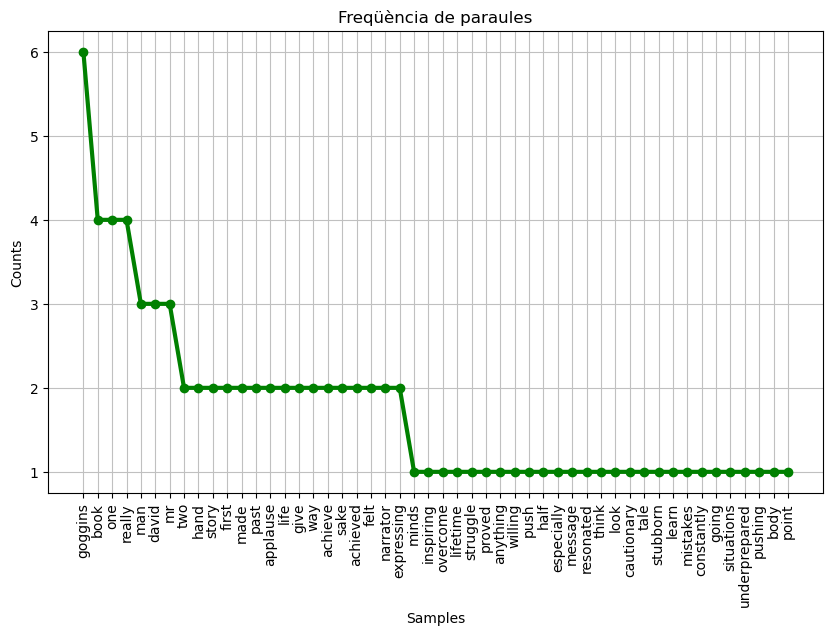

In [16]:
# Calcular la freqüència 
freq2 = FreqDist(filtered_tokens)

plt.figure(figsize=(10, 6))
freq2.plot(50, cumulative=False, linewidth=3, title='Freqüència de paraules', color='green', marker='o')

plt.show()


Podem veure que eliminant les stopwords,  googins (autor del llibre) es la paraula més esmentada, book a segona mes esmentada...

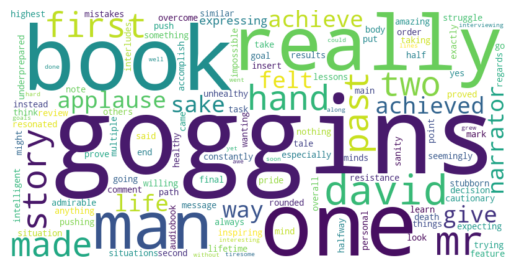

In [17]:
from wordcloud import WordCloud

wordcloud1 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(freq2)

plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()

**Stemming**

El **stemming** implica **eliminar els sufixos de les paraules**, com "ing" o "ed", per reduir-les a la seva forma bàsica. Per exemple, la paraula "jumping" es reduiria a "jump".

In [18]:
from nltk.stem import PorterStemmer

stemming = [PorterStemmer().stem(element) for element in filtered_tokens]

print(stemming)

['two', 'mind', 'book', 'one', 'hand', 'inspir', 'stori', 'man', 'overcom', 'lifetim', 'struggl', 'prove', 'anyth', 'will', 'push', 'first', 'half', 'book', 'especi', 'messag', 'reson', 'made', 'think', 'david', 'goggin', 'man', 'look', 'hand', 'cautionari', 'tale', 'man', 'stubborn', 'learn', 'past', 'mistak', 'constantli', 'go', 'situat', 'underprepar', 'push', 'bodi', 'past', 'point', 'saniti', 'order', 'accomplish', 'goal', 'seemingli', 'expect', 'applaus', 'life', 'death', 'situat', 'might', 'give', 'said', 'applaus', 'instead', 'alway', 'tri', 'prove', 'someth', 'realli', 'unhealthi', 'way', 'go', 'life', 'overal', 'two', 'main', 'lesson', 'take', 'mr', 'goggin', 'stori', 'one', 'realli', 'put', 'mind', 'task', 'achiev', 'imposs', 'second', 'noth', 'admir', 'take', 'path', 'highest', 'resist', 'sake', 'person', 'pride', 'ye', 'mr', 'goggin', 'achiev', 'amaz', 'thing', 'other', 'achiev', 'similar', 'result', 'intellig', 'healthi', 'way', 'end', 'came', 'exactli', 'halfway', 'mark'

## - Exercici 3
**Realitza sentiment analysis al teu conjunt de dades.**

L'anàlisi de sentiments és un procés que avalua les emocions expressades en un text, categoritzant-les com a positives, negatives o neutres. 

Per l'anàlisi faré servir la llibreria VADER (Valence Aware Dictionary and Sentiment Reasoner).

In [19]:
sentiment = ' '.join(stemming)

# Realitzo l'analisi de sentiments
sentiment_analisi = SentimentIntensityAnalyzer().polarity_scores(sentiment)
print(sentiment_analisi)

# Classificació del sentiment
score = sentiment_analisi['compound']

if score >= 0.05:
    sentiment_analisi = "Positiu"
elif compound_score <= -0.05:
    sentiment_analisi = "Negatiu"
else:
    sentiment_analisi = "Neutre"

print(f'\nPuntuació de sentiment: {score}')
print(f'Classificació de sentiment: {sentiment_analisi}')

{'neg': 0.055, 'neu': 0.855, 'pos': 0.089, 'compound': 0.7258}

Puntuació de sentiment: 0.7258
Classificació de sentiment: Positiu


La review té una puntuació de 3/5 estrelles, el sentiment segons la puntuació és positiu, tenint en compte que la review presenta una bona tonalitat i es una critica constructiva així que estic d'acord amb els resultats.